# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data['data'], columns= iris_data['feature_names'])
    df.columns = [i.strip(" (cm)") for i in df.columns.tolist()]
    df['target'] = iris_data['target']
    df['class'] = iris_data.target_names[iris_data.target]
    return df
df_iris = create_df()
df_iris.sample(n=10)


    # df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
    # df.columns = [i.strip(" (cm)") for i in df.columns.tolist()]
    # df['target'] = dataset.target
    # df['class'] = dataset.target_names[dataset.target]


,sepal length,sepal width,petal length,petal width,target,class
87,6.3,2.3,4.4,1.3,1,versicolor
130,7.4,2.8,6.1,1.9,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
43,5.0,3.5,1.6,0.6,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor
46,5.1,3.8,1.6,0.2,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
124,6.7,3.3,5.7,2.1,2,virginica
74,6.4,2.9,4.3,1.3,1,versicolor
146,6.3,2.5,5.0,1.9,2,virginica


In [ ]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [10]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris.drop(['target', 'class'], axis= 1).values
x.shape

(150, 4)

In [11]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [12]:
mergings = 0 
# YOUR CODE HERE
mergings = linkage(x, method='complete')


In [13]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

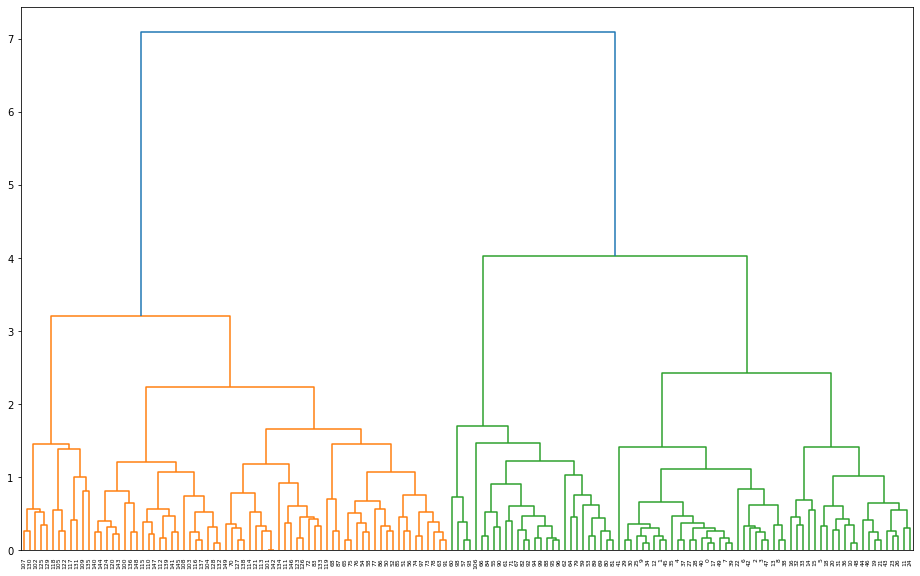

In [21]:
dn = 0
# YOUR CODE HERE
plt.figure(figsize=(16,10))
dn= dendrogram(mergings, leaf_rotation= 90, leaf_font_size= 6)
plt.show()

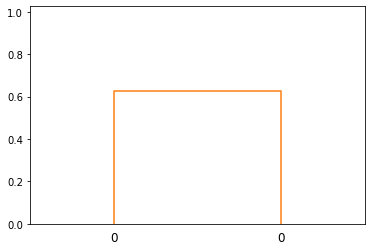

In [22]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [25]:
from sklearn.cluster import KMeans

df = pd.read_csv('C:/Users/andre/Documents/Strive_repository/local_exercise/Chapter 02/02. Clustering/01. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('C:/Users/andre/Documents/Strive_repository/local_exercise/Chapter 02/02. Clustering/01. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [28]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [29]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [30]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [35]:
# YOUR CODE HERE
labels = model.predict(points)

In [36]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [40]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for lab, pt in zip(labels, points):
        if lab == 0:
            data_0.append(pt)
        elif lab == 1:
            data_1.append(pt)
        else:
            data_2.append(pt)
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95, 2)
(94, 2)
(111, 2)


In [38]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

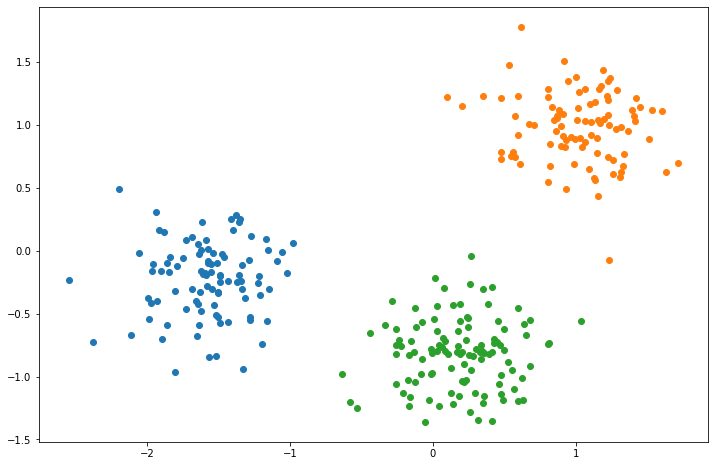

In [52]:
# plotting the data 

# YOUR CODE HERE
plt.figure(figsize=(12, 8))
plt.scatter(data_0[:,0],data_0[:,1], label ='group_0')
plt.scatter(data_1[:,0],data_1[:,1], label ='group_1')
plt.scatter(data_2[:,0],data_2[:,1], label ='group_2')
plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [ ]:

# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [ ]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

In [ ]:
#plot the new labels


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#plot all the points together

# YOUR CODE HERE
raise NotImplementedError()